# PROJECT SUMMARY:
## BUISNESSCASE & GOAL OF PROJECT: BASED ON GIVEN FEATURE OF DATASET WE NEED TO PREDICT THE PERFOMANCE RATING OF EMPLOYEE
### INX Future Inc Employee Performance - Project
The Data science project which is given here is an analysis of employee performance.


**The Goal and Insights of the project are as follows:**

* Department wise performances
* Top 3 Important Factors effecting employee performance
* A trained model which can predict the employee performance based on factors as inputs.
 This will be used to hire employees
* Recommendations to improve the employee performance based on insights from analysis


The given Employee dataset consist of 1200 rows. The features present in the data are 28 columns. The shape of the dataset is 1200x28. The 28 features
are classified into quantitative and qualitative where 19 features are quantitative (11 columns consists numeric data & 8 columns consists ordinal data) and
8 features are qualitative. EmpNumber consist alphanumerical data (distinct values) which doesn't play a role as a relevant feature for performance rating.

From Correlation we can get the important aspects of the data, Correlation between features and Performance Rating.Correlation is a statistical measure
that expresses the extent to which two variables are linearly related.The analysis of the project has gone through the stage of Univariate,Bivariate & Multivariate analysis,
correlation analysis and analysis by each department to satisfy the project goal.

## Step 1: Understand the Problem
### Objective: Identify and understand the factors affecting employee performance at INX Future Inc.

## Step 2 Exploratory Data Analysis (EDA)
### EXPLOTARY DATA ANALYSIS SUMMARY:
* Basic checks of data
* Examine the data
* Statistical measures of data
* Department Wise performance 
* Percent count of employee department with performance rating
* Top 3 Important Factors effecting employee performance
* Checking the distribution of continuous fon of data

In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data

In [274]:
!pip install xlrd

In [275]:
data = pd.read_excel('C:/Users/Mukesh/data science/project/Employee-Performance-Analysis/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
pd.set_option('display.max_columns',None) # Used to display the all features

#### BASIC CHECKS OF DATA

In [277]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [278]:
data.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [279]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [280]:
data.shape

(1200, 28)

### EXAMINE THE DATA

In [282]:
print(data.info())  ##basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [283]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [284]:
data.describe(include="O")

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E1001000,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


In [285]:
print('UNIQUE VALUES: \n')
for i in data.columns:
    print(i,':', data[i].unique()) #To check whether there is any absurd value to clean

UNIQUE VALUES: 

EmpNumber : ['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age : [32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender : ['Male' 'Female']
EducationBackground : ['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus : ['Single' 'Married' 'Divorced']
EmpDepartment : ['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole : ['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFr

### DEPARTMENT WISE PERFORMANCE RATING

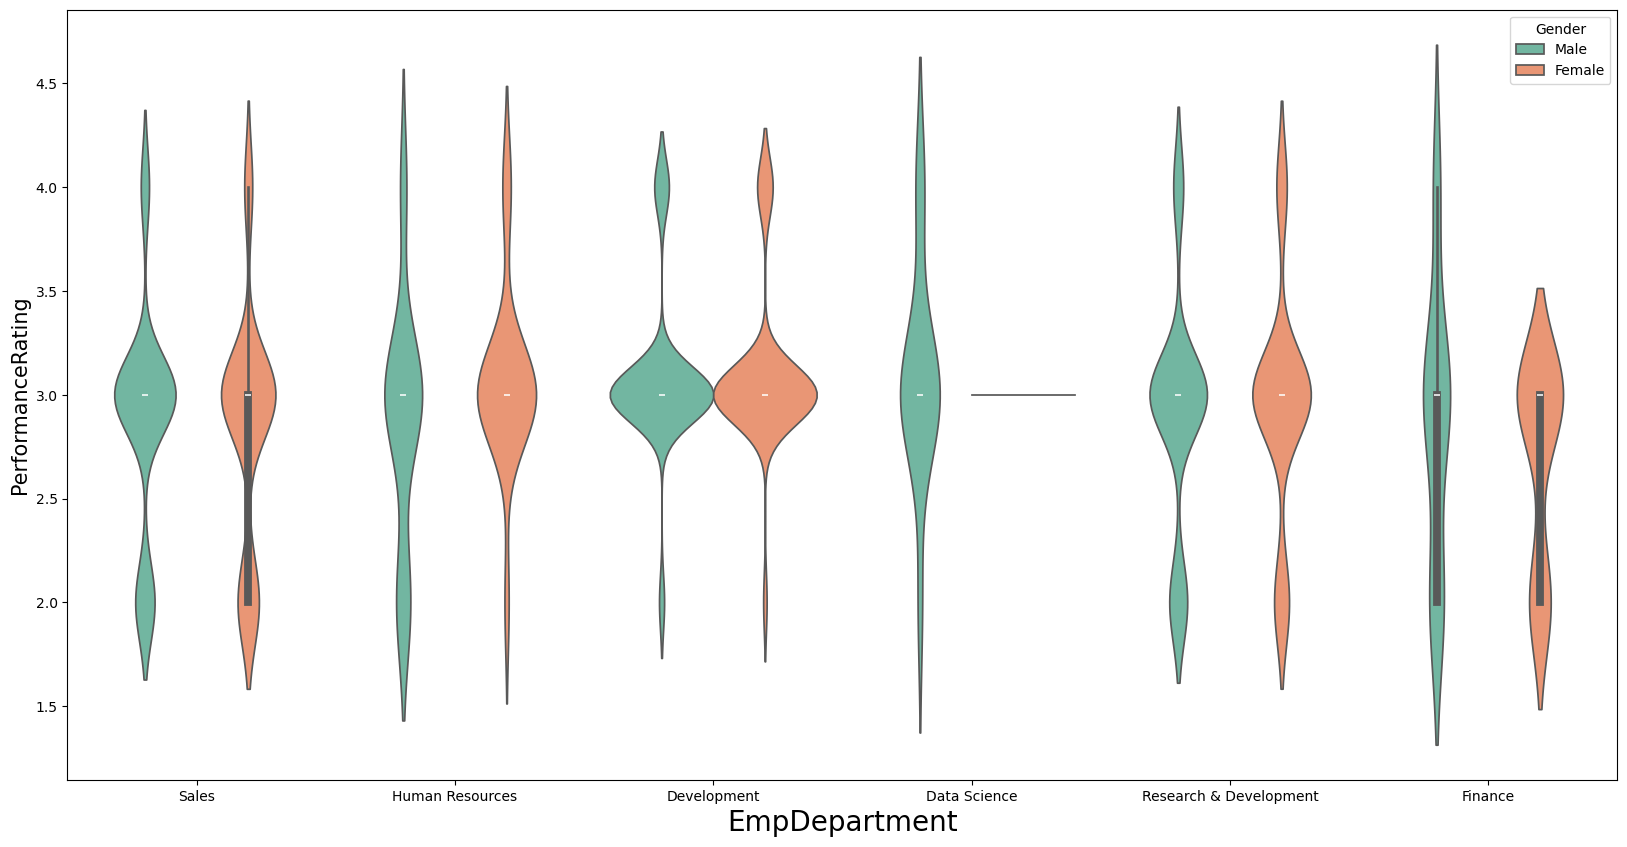

In [287]:
plt.figure(figsize=(20,10),facecolor='white')
sns.violinplot(x='EmpDepartment',y='PerformanceRating',hue=data.Gender,data=data,palette='Set2')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('PerformanceRating',fontsize=15)
plt.show()

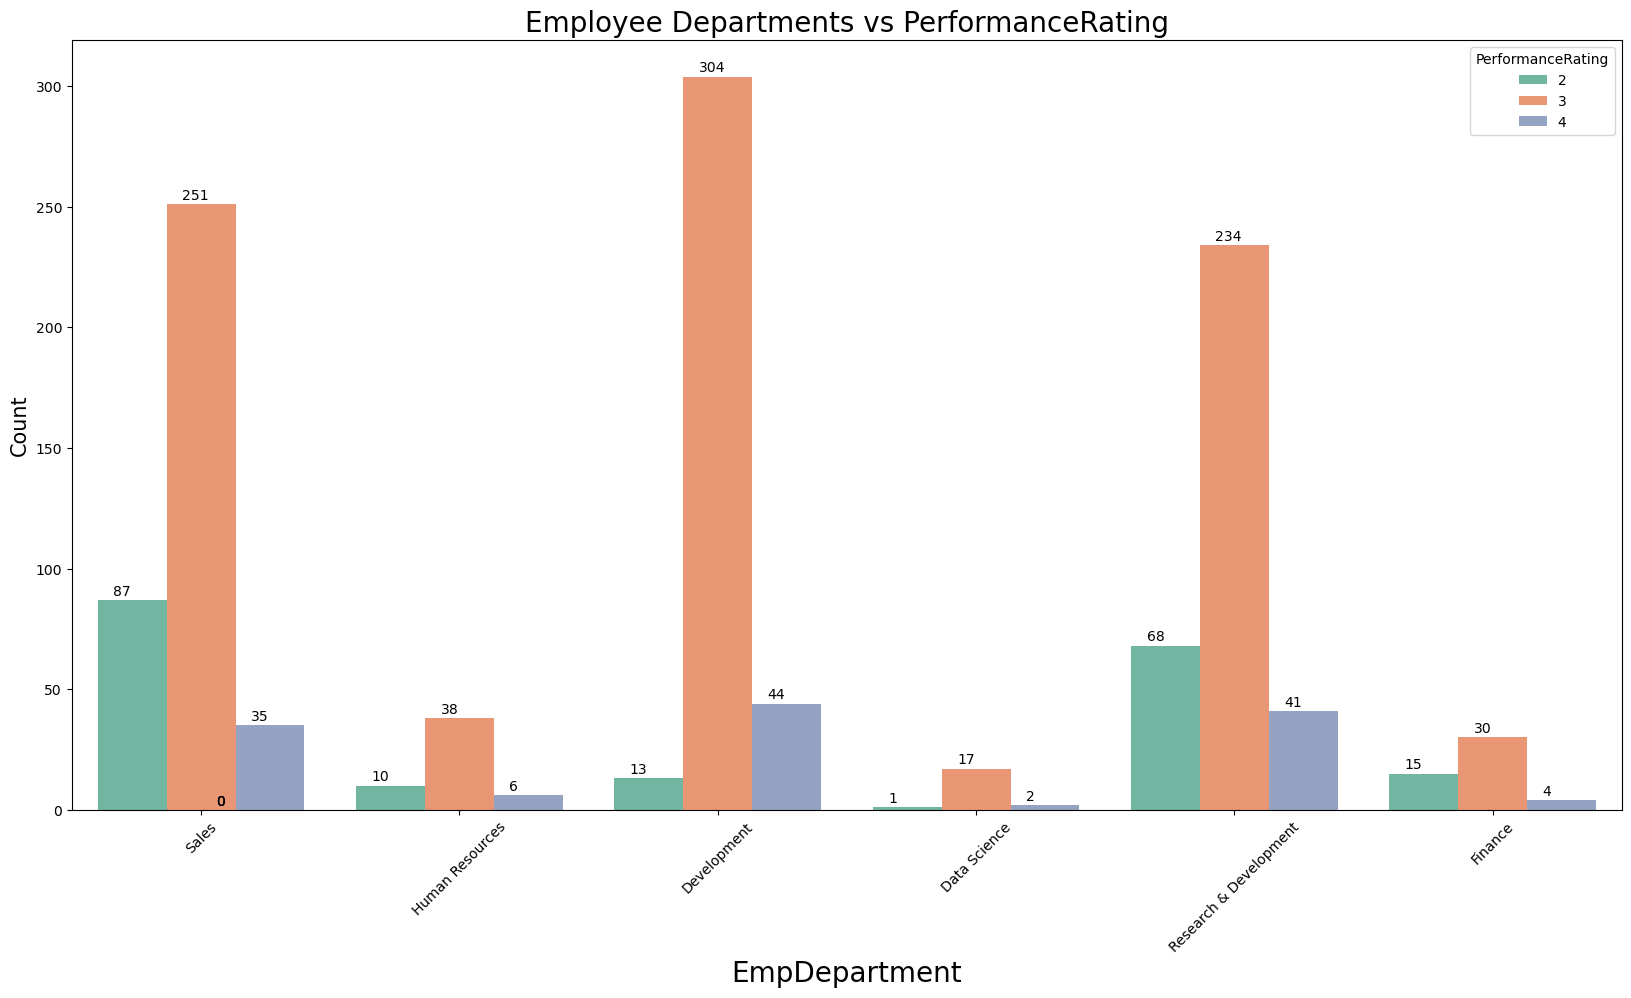

In [288]:
plt.figure(figsize=(20, 10), facecolor='white')
ax = sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data, palette='Set2')
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x() + 0.06, i.get_height() + 2))
plt.title('Employee Departments vs PerformanceRating', fontsize=20)
plt.xlabel('EmpDepartment', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45)
plt.show()


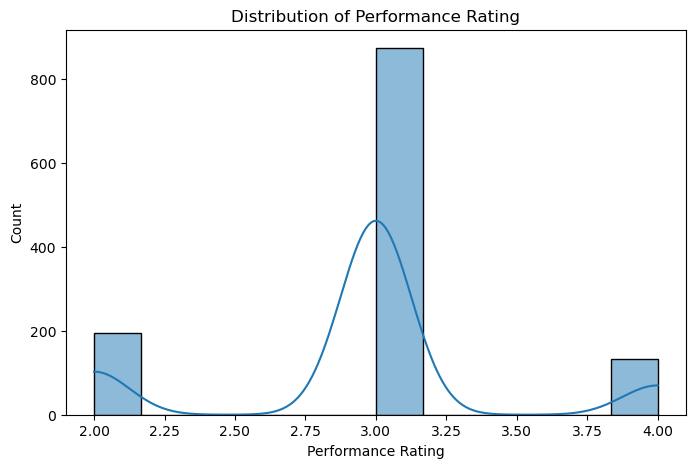

In [289]:
plt.figure(figsize=(8, 5))
sns.histplot(data['PerformanceRating'], kde=True)
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.show()  # Visualize the distribution of PerformanceRating

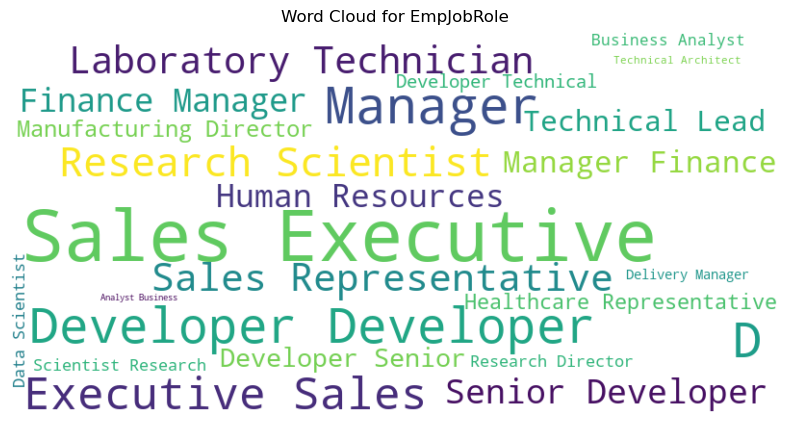

In [290]:
textual_data = ' '.join(data['EmpJobRole'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(textual_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for EmpJobRole')
plt.show() # Word cloud for textual data

#### PERCENT COUNT IN EMPLOYEE DEPARTMENT WITH PERFORMANCE RATING

In [292]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales,All
PerformanceRating,,,,,,,
2,0.08,1.08,1.25,0.83,5.67,7.25,16.17
3,1.42,25.33,2.50,3.17,19.50,20.92,72.83
4,0.17,3.67,0.33,0.50,3.42,2.92,11.00
All,1.67,30.08,4.08,4.50,28.58,31.08,100.00


### 3 Identify Top 3 Factors Affecting Employee Performance
- Perform feature importance analysis to identify the top three factors influencing employee performance
- Use statistical and machine learning techniques to uncover hidden patterns and relationships

In [294]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy import stats

In [295]:
# Separate features (X) and target variable (y)
X = data.drop(['PerformanceRating'], axis=1)
y = data['PerformanceRating']

In [296]:
# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [297]:
# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [298]:
# Train a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [299]:
# Train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X, y)

DecisionTreeRegressor(random_state=42)

### Feature importance analysis - Random Forest

Top 3 Features Affecting Employee Performance:
EmpLastSalaryHikePercent: 0.23308086340231407
EmpEnvironmentSatisfaction: 0.212738558804534
YearsSinceLastPromotion: 0.18997657371764842


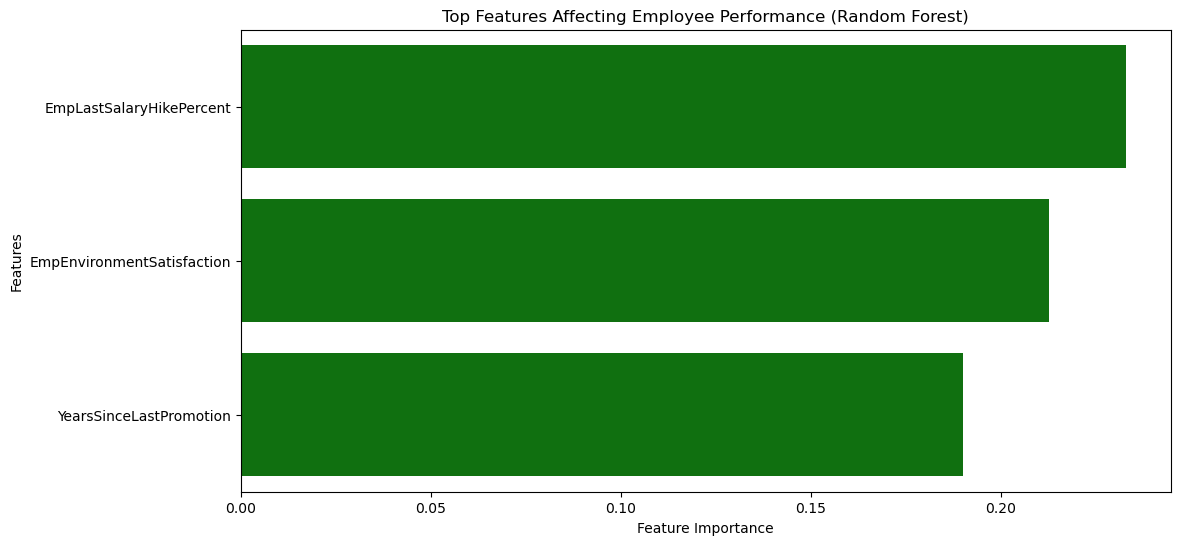

In [301]:
# Feature importance analysis
feature_importances =rf_model.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_indices = feature_importances.argsort()[::-1]
# Display the top 3 features and their importance scores
top_features = 3
print("Top", top_features, "Features Affecting Employee Performance:")
for i in range(top_features):
    print(f"{feature_names[sorted_indices[i]]}: {feature_importances[sorted_indices[i]]}")

# Plot the top features for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices[:top_features]], y=feature_names[sorted_indices[:top_features]], color='green')
plt.title('Top Features Affecting Employee Performance (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [302]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [303]:
# 3.Employee Work life balance
pd.crosstab(data['YearsSinceLastPromotion'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
YearsSinceLastPromotion,,,,
0,3,405,61,469
1,66,195,36,297
2,37,83,7,127
3,15,25,5,45
4,14,37,2,53
5,10,21,4,35
6,8,12,4,24
7,15,41,6,62
8,5,6,0,11


### Feature importance - Gradient Boosting

Top 3 Features Affecting Employee Performance (Gradient Boosting):
Age: 0.000564667844143023
DistanceFromHome: 0.0009011788413572945
EmpEducationLevel: 0.0


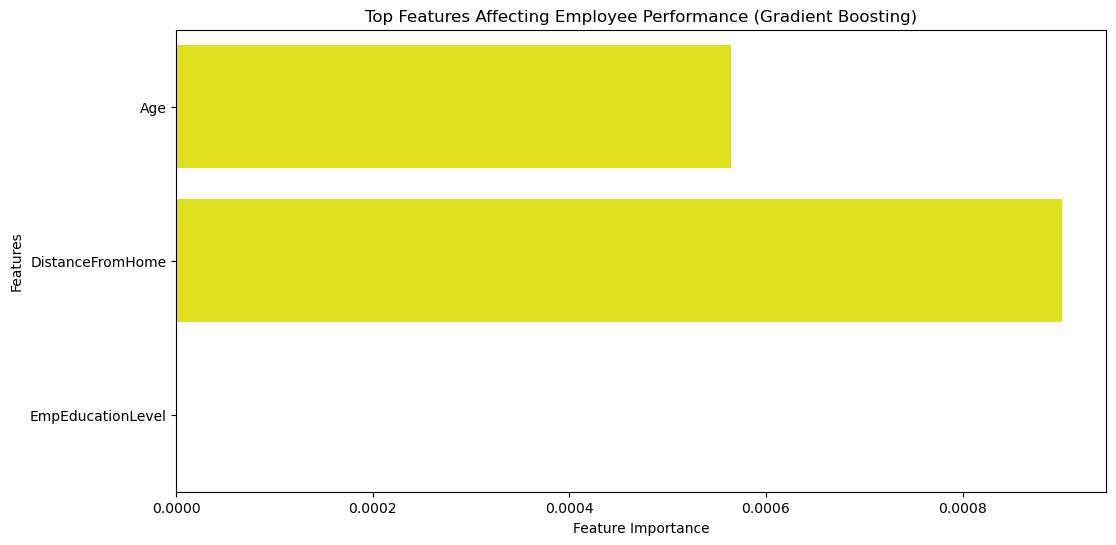

In [305]:
# Feature importance analysis
feature_importances_gb = gb_model.feature_importances_

# Display the top 3 features and their importance scores
top_features_gb = 3
print("Top", top_features_gb, "Features Affecting Employee Performance (Gradient Boosting):")
for i in range(top_features_gb):
    print(f"{feature_names[i]}: {feature_importances_gb[i]}")
    
# Plot the top features for Gradient Boosting
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_gb[:top_features_gb], y=feature_names[:top_features_gb], color='yellow')
plt.title('Top Features Affecting Employee Performance (Gradient Boosting)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [306]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [307]:
# 3.Employee Work life balance
pd.crosstab(data['YearsSinceLastPromotion'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
YearsSinceLastPromotion,,,,
0,3,405,61,469
1,66,195,36,297
2,37,83,7,127
3,15,25,5,45
4,14,37,2,53
5,10,21,4,35
6,8,12,4,24
7,15,41,6,62
8,5,6,0,11


### Feature importance - Decision Tree

Top 3 Features Affecting Employee Performance (Decision Tree):
Age: 0.008296089134336581
DistanceFromHome: 0.005554900757781032
EmpEducationLevel: 0.006434152800802563


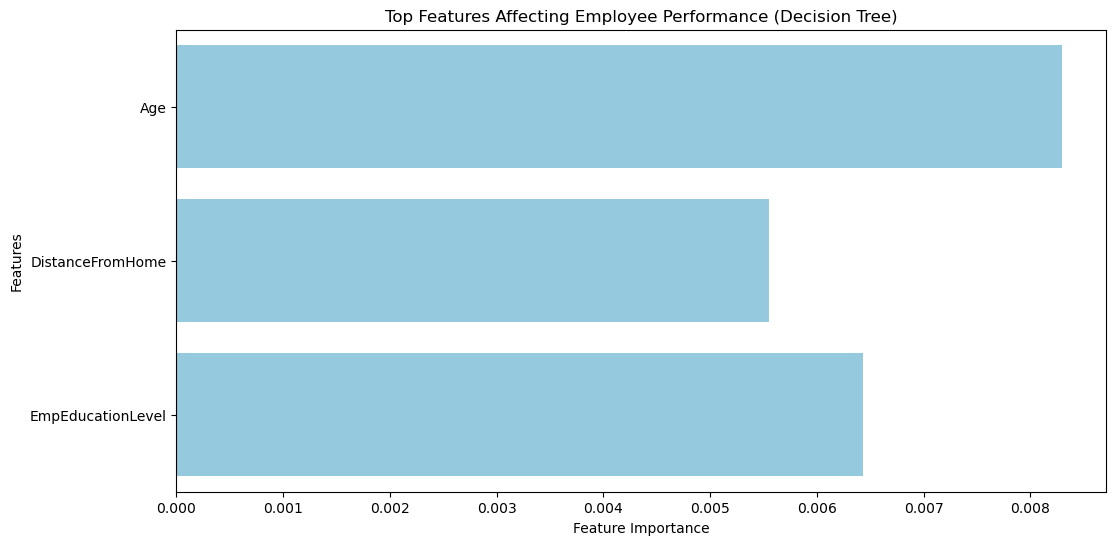

In [309]:
# Feature importance analysis
feature_importances_dt = dt_model.feature_importances_

# Display the top 3 features and their importance scores
top_features_dt = 3
print("Top", top_features_dt, "Features Affecting Employee Performance (Decision Tree):")
for i in range(top_features_dt):
    print(f"{feature_names[i]}: {feature_importances_dt[i]}")
    
# Plot the top features for Decision Tree
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_dt[:top_features_dt], y=feature_names[:top_features_dt], color='skyblue')
plt.title('Top Features Affecting Employee Performance (Decision Tree)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [310]:
# 2.Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
EmpLastSalaryHikePercent,,,,
11,28,140,1,169
12,30,123,2,155
13,27,138,3,168
14,28,140,4,172
15,11,67,4,82
16,12,54,2,68
17,9,55,3,67
18,10,63,0,73
19,10,51,2,63


In [311]:
# 3.Employee Work life balance
pd.crosstab(data['YearsSinceLastPromotion'],data['PerformanceRating'],margins=True)

PerformanceRating,2,3,4,All
YearsSinceLastPromotion,,,,
0,3,405,61,469
1,66,195,36,297
2,37,83,7,127
3,15,25,5,45
4,14,37,2,53
5,10,21,4,35
6,8,12,4,24
7,15,41,6,62
8,5,6,0,11


# Here are the top 3 features affecting employee performance according to each model:
### Random Forest:
- EmpLastSalaryHikePercent (23.31%)
- EmpEnvironmentSatisfaction (21.27%)
- YearsSinceLastPromotion (18.99%)
### Gradient Boosting:
- Age (0.06%)
- DistanceFromHome (0.09%)
- EmpEducationLevel (0.0%)
### Decision Tree:
- Age (0.83%)
- DistanceFromHome (0.56%)
- EmpEducationLevel (0.64%)

### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE 
* Those feature continuous in nature only use this feature to plot a distribution

**Distplot:** Distplot is used to observe how the data is distributed in a particular dataset.


In [314]:
# Get the continuous features
data.select_dtypes('int64').head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


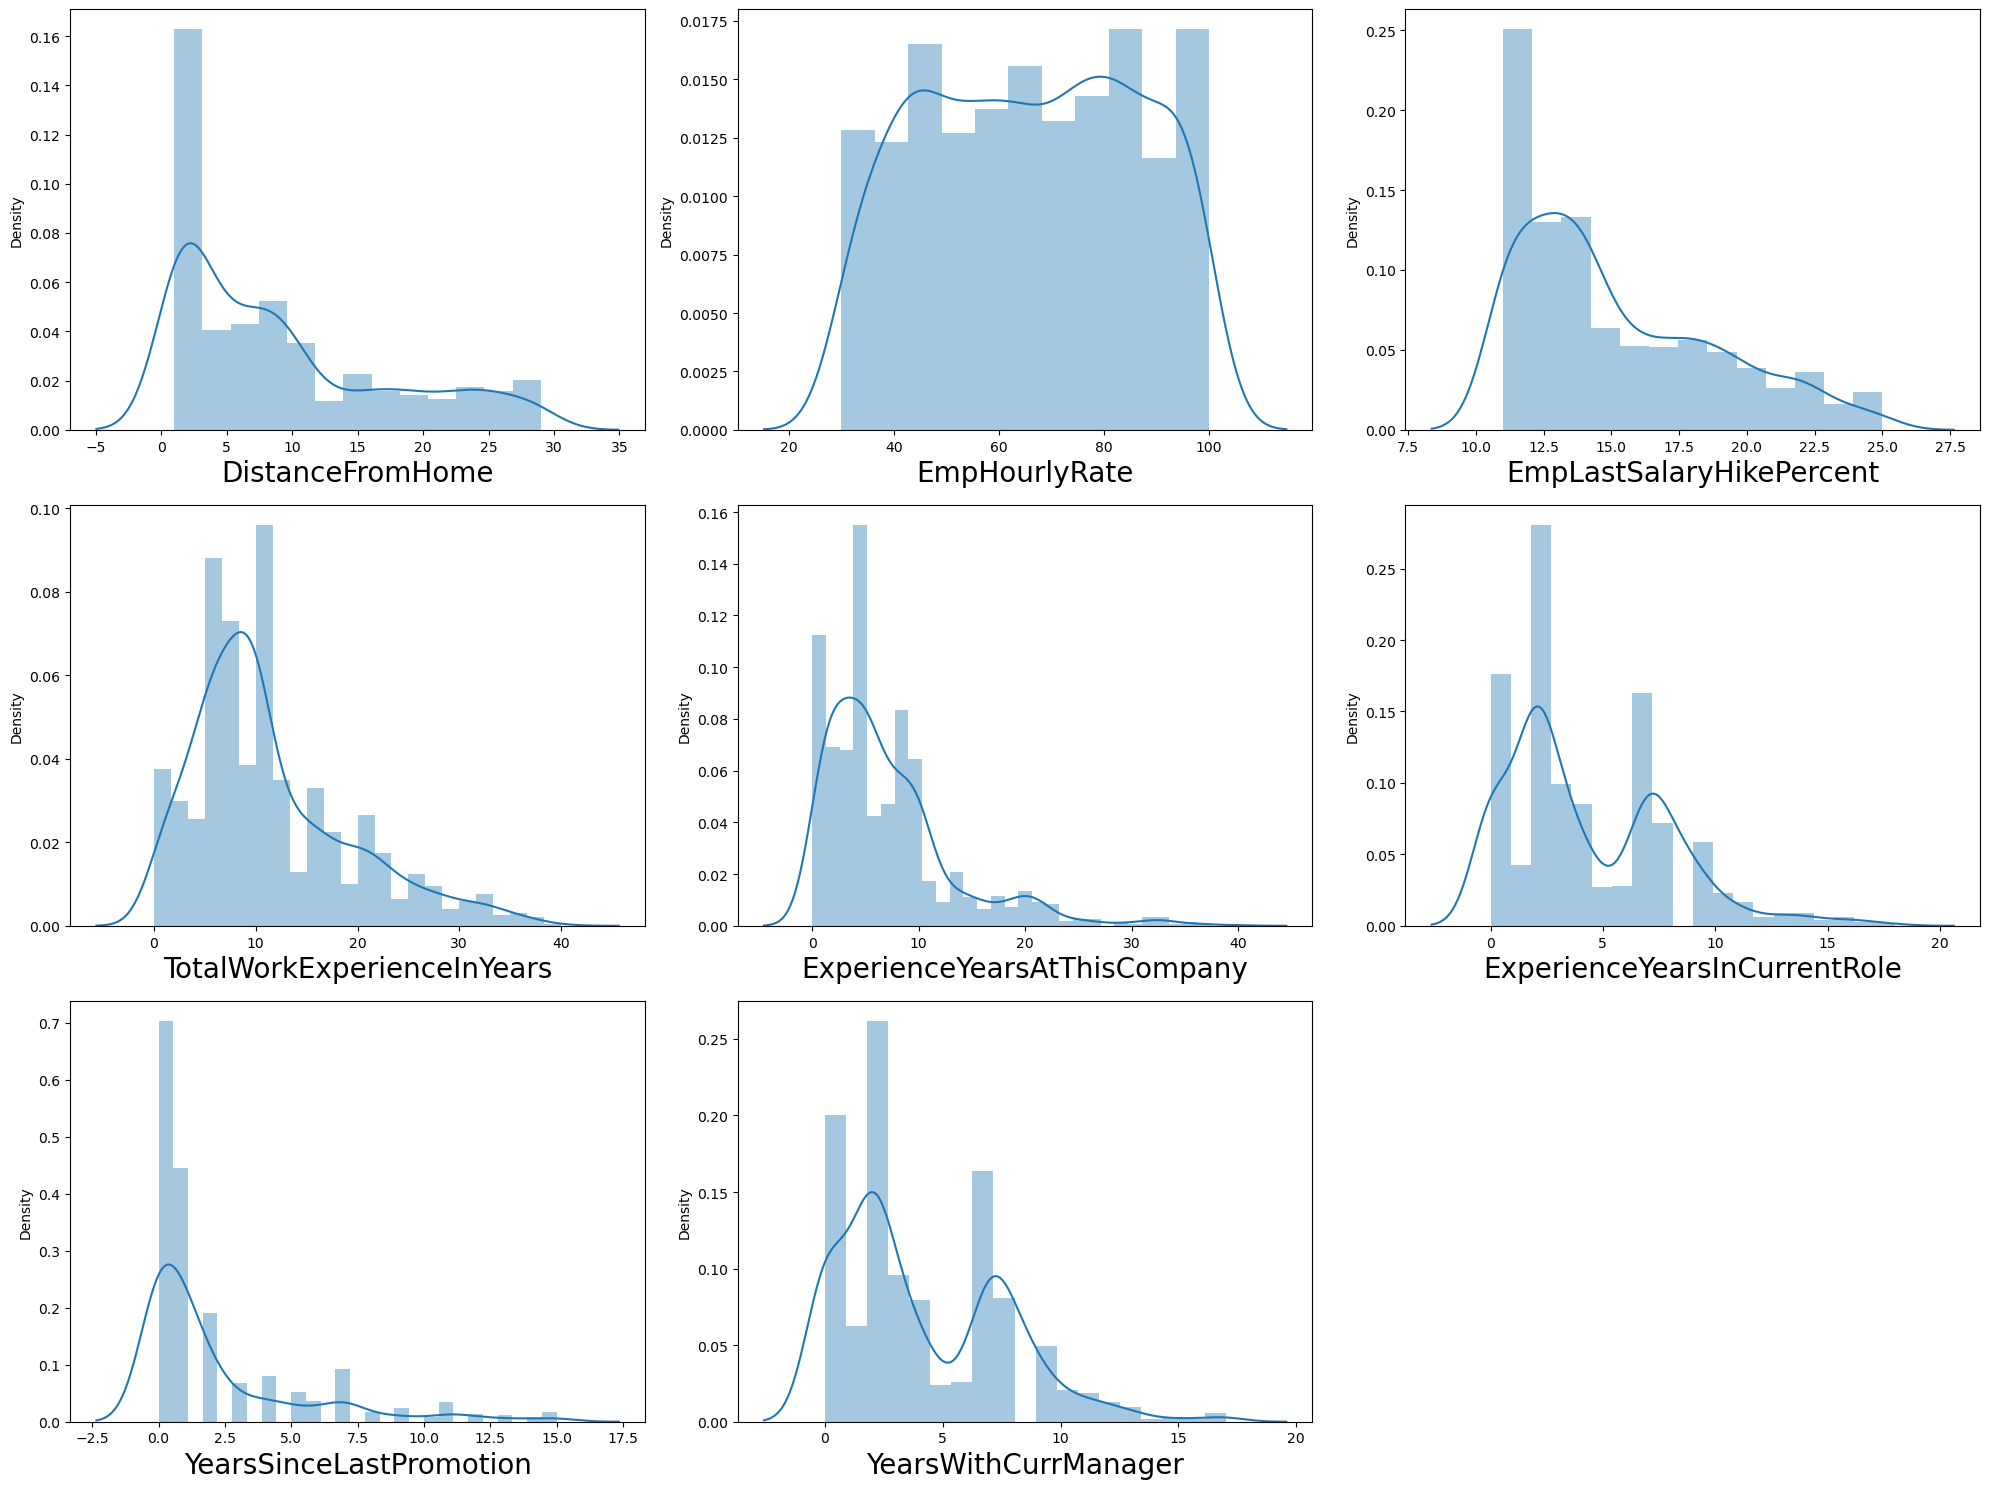

In [315]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Make a list of continuous feature in nature
continuous = data[['DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
                   'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,15))
plotno = 1 

for column in continuous: 
    if plotno<=8:   
        plt.subplot(3,3,plotno) 
        sns.distplot(x=continuous[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1
plt.tight_layout()
plt.show()

### DATA PRE-PROCESSING & FEATURE SELECTION:

#### DATA PRE-PROCESSING SUMMARY:
* Ckeck Missing Value
* Convert categorical to numerical
* Check outliers & Impute outliers
* Feature transformation
* Feature scaling


#### FEATURE SELECTION SUMMARY:
* Drop unique & Constant Column
* Check correlation with heatmap & Remove highly correlated feature
* Check Duplicates 
* Principle component analysis
* Save pre-process data

In [317]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### CONVERT CATEGORICAL TO NUMERICAL

In [319]:
# Get all categorical feature list
list(data.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### 1.Gender: 

In [321]:
# Get value counts of gender
data.Gender.value_counts()

Gender
Male      725
Female    475
Name: count, dtype: int64

In [322]:
# Use mannual encoding to map the labels
data.Gender = data.Gender.map({'Male':1,'Female':0})

#### 2.Education Background

In [324]:
# Get value counts of Education Background
data.EducationBackground.value_counts()


EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [325]:
# Use frequency encoding
data.loc[data['EducationBackground']=='Life Sciences','EducationBackground']=5
data.loc[data['EducationBackground']=='Medical','EducationBackground']=4
data.loc[data['EducationBackground']=='Marketing','EducationBackground']=3
data.loc[data['EducationBackground']=='Technical Degree','EducationBackground']=2
data.loc[data['EducationBackground']=='Other','EducationBackground']=1
data.loc[data['EducationBackground']=='Human Resources','EducationBackground']=0

In [326]:
# Checking conversion happen or not
data.EducationBackground.value_counts()

EducationBackground
5    492
4    384
3    137
2    100
1     66
0     21
Name: count, dtype: int64

#### 3.Marital Status

In [328]:
# Get the value counts of marital status
data.MaritalStatus.value_counts()

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [329]:
# Use mannual encoding
data.MaritalStatus = data.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

In [330]:
# Check conversion happen or not
data.MaritalStatus.value_counts()

MaritalStatus
2    548
1    384
0    268
Name: count, dtype: int64

#### 4.Employee Department

In [332]:
# Get the value counts of employee department 
data.EmpDepartment.value_counts()

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [333]:
# Use Frequency encoding
data.loc[data['EmpDepartment']=='Sales','EmpDepartment']=5
data.loc[data['EmpDepartment']=='Development','EmpDepartment']=4
data.loc[data['EmpDepartment']=='Research & Development','EmpDepartment']=3
data.loc[data['EmpDepartment']=='Human Resources','EmpDepartment']=2
data.loc[data['EmpDepartment']=='Finance','EmpDepartment']=1
data.loc[data['EmpDepartment']=='Data Science','EmpDepartment']=0

In [334]:
# Check conversion happen or not
data.EmpDepartment.value_counts()

EmpDepartment
5    373
4    361
3    343
2     54
1     49
0     20
Name: count, dtype: int64

#### 5.Employee Job Role

In [336]:
# Getting the value counts of EmpJobRole
data.EmpJobRole.value_counts()

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [337]:
# Use frequency encoding because feature contain a lots of label
data.loc[data['EmpJobRole']=='Sales Executive','EmpJobRole']=18
data.loc[data['EmpJobRole']=='Developer','EmpJobRole']=17
data.loc[data['EmpJobRole']=='Manager R&D','EmpJobRole']=16
data.loc[data['EmpJobRole']=='Research Scientist','EmpJobRole']=15
data.loc[data['EmpJobRole']=='Sales Representative','EmpJobRole']=14
data.loc[data['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
data.loc[data['EmpJobRole']=='Senior Developer','EmpJobRole']=12
data.loc[data['EmpJobRole']=='Manager','EmpJobRole']=11
data.loc[data['EmpJobRole']=='Finance Manager','EmpJobRole']=10
data.loc[data['EmpJobRole']=='Human Resources','EmpJobRole']=9
data.loc[data['EmpJobRole']=='Technical Lead','EmpJobRole']=8
data.loc[data['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
data.loc[data['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
data.loc[data['EmpJobRole']=='Data Scientist','EmpJobRole']=5
data.loc[data['EmpJobRole']=='Research Director','EmpJobRole']=4
data.loc[data['EmpJobRole']=='Business Analyst','EmpJobRole']=3
data.loc[data['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
data.loc[data['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
data.loc[data['EmpJobRole']=='Technical Architect','EmpJobRole']=0

In [338]:
# Check conversion happen or not
data.EmpJobRole.value_counts()

EmpJobRole
18    270
17    236
16     94
15     77
14     69
13     64
12     52
11     51
10     49
9      45
8      38
7      33
6      33
5      20
4      19
3      16
2      15
1      12
0       7
Name: count, dtype: int64

#### 6.Business Travel Frequency:

In [340]:
# Get the value count of buisness travel frequency
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [341]:
# Use mannual encoding Because feature contain minimum label
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

In [342]:
# Check conversion happen or not
data.BusinessTravelFrequency.value_counts()

BusinessTravelFrequency
2    846
1    222
0    132
Name: count, dtype: int64

#### 7.Overtime:

In [344]:
# Get the value count of Overtime
data.OverTime.value_counts()

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [345]:
# Use mannual Encoding
data.OverTime = data.OverTime.map({'No':1,'Yes':0})

In [346]:
# Check conversion happen or not
data.OverTime.value_counts()

OverTime
1    847
0    353
Name: count, dtype: int64

#### 8.Attrition

In [348]:
# Get the value counts of Attrition
data.Attrition.value_counts()

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [349]:
# Use Mannual encoding because feature contain less no of label
data.Attrition = data.Attrition.map({'No':1,'Yes':0})

In [350]:
# Check conversion happen or not
data.Attrition.value_counts()

Attrition
1    1022
0     178
Name: count, dtype: int64

In [351]:
# Check all data features 
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3


### CHECK OUTLIERS AND IMPUTE OUTLIERS:

**BoxPlot:** Box plots are used to show distributions of numeric data values as well as it helps to detect the outliers.

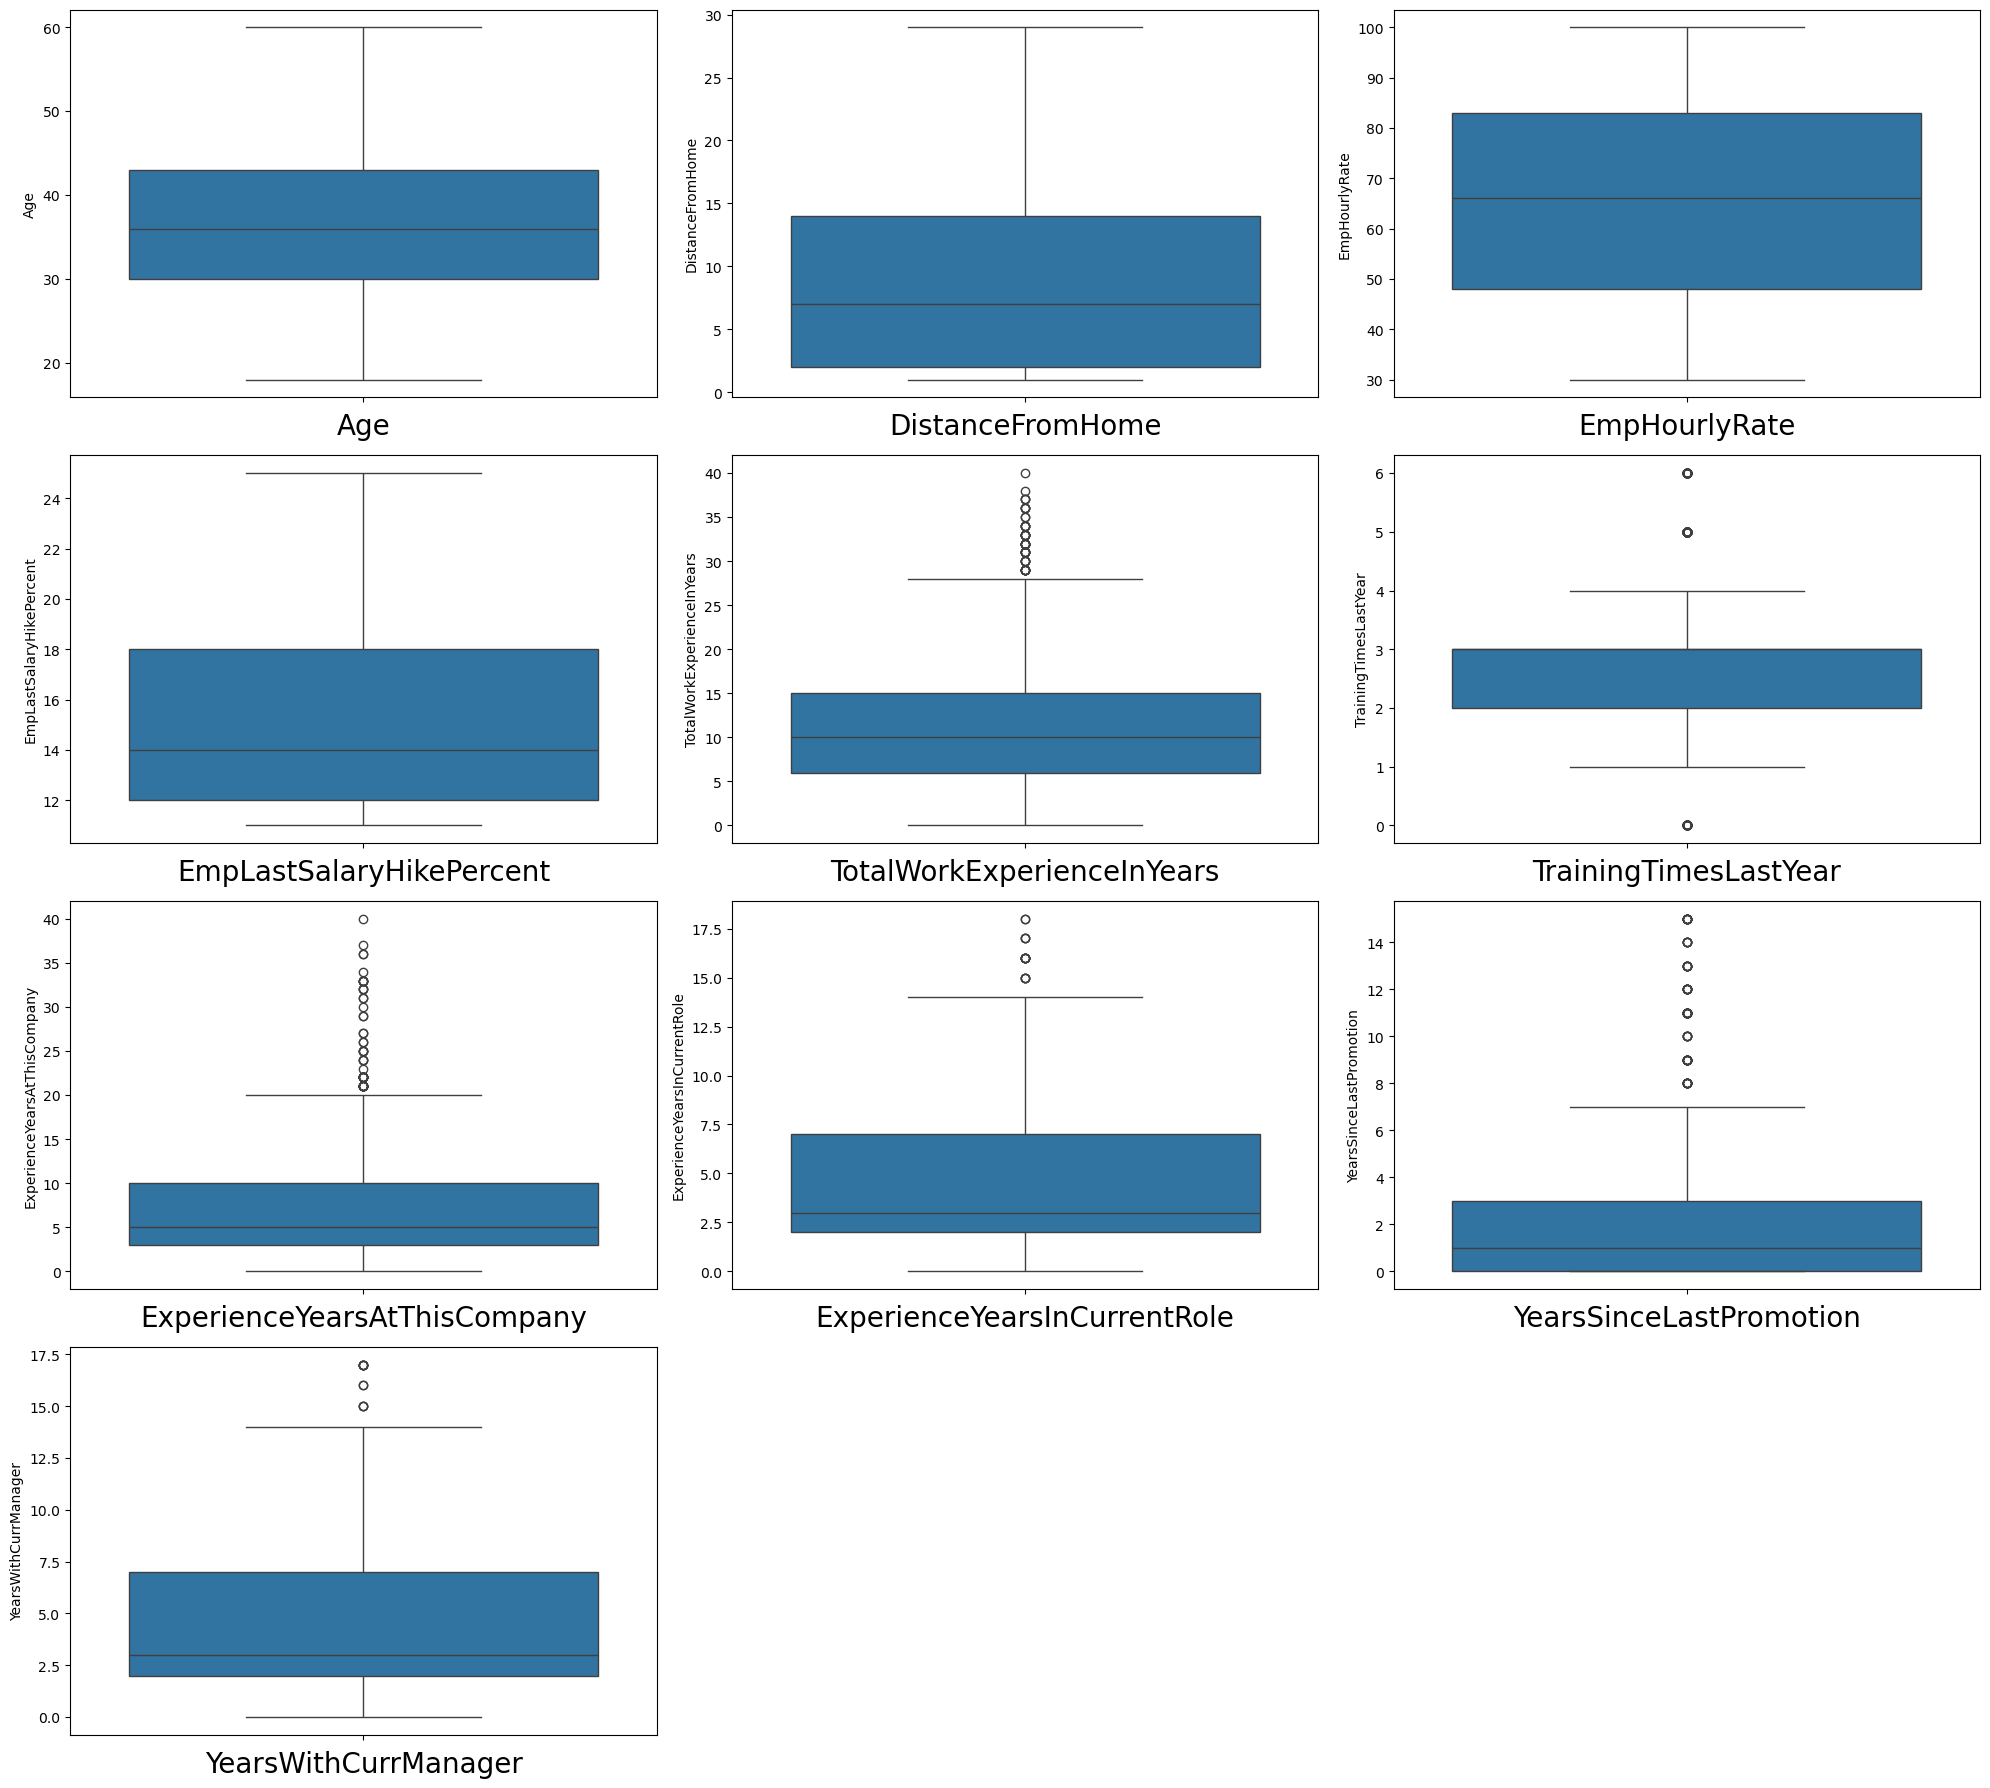

In [353]:
out = data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent',
                   'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                   'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
plt.figure(figsize=(20,18)) 
plotno = 1 
for column in out: 
    if plotno<=12: 
        plt.subplot(4,3,plotno) 
        sns.boxplot(out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

**IQR:**
* IQR stand for the interquatile range, When a data set has outliers or extreme values, we summarize a typical value using the median as opposed to the mean. which is the difference between the first and third quartiles

#### 1.Total Work Experiance in year

In [356]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TotalWorkExperienceInYears'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [357]:
# Impute outlier
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=data['TotalWorkExperienceInYears'].median()

In [358]:
# filtering data after imputation
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2.Training Times Last Year

In [360]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['TrainingTimesLastYear'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [361]:
# Impute outlier in max & minmum limit
data.loc[data['TrainingTimesLastYear'] < min_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()
data.loc[data['TrainingTimesLastYear'] > max_limit,'TrainingTimesLastYear']=data['TrainingTimesLastYear'].median()

In [362]:
# Filtering the min limit
data.loc[data['TrainingTimesLastYear'] < min_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [363]:
# Filtering the max limit
data.loc[data['TrainingTimesLastYear'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 3.Experience Years At This Company

In [365]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [366]:
# Impute outlier
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [367]:
# Filtering the data
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 4.Experience Years In Current Role

In [369]:
# Use iqr range because some skewed in data
iqr = stats.iqr(data['ExperienceYearsInCurrentRole'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [370]:
# Impute the outlier
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = data['ExperienceYearsInCurrentRole'].median()

In [371]:
# Filtering the data
data.loc[data['ExperienceYearsInCurrentRole'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 5.Years Since Last Promotion

In [373]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsSinceLastPromotion'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit 7.5


In [374]:
# impute outlier
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=data['YearsSinceLastPromotion'].median()

In [375]:
# Filtering data
data.loc[data['YearsSinceLastPromotion'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 6.Years With Current Manager

In [377]:
# use iqr because some skewed in data
iqr = stats.iqr(data['YearsWithCurrManager'],interpolation='midpoint')
print("IQR:",iqr)

# Get first and third quantile
Q1 = data['YearsWithCurrManager'].quantile(0.25)
Q3 = data['YearsWithCurrManager'].quantile(0.75)

# Get manimum and maximum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 +1.5*iqr
print("Maximum limit",max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit 14.5


In [378]:
# impute outlier
data.loc[data['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=data['YearsWithCurrManager'].median()

In [379]:
# Filtering the data
data.loc[data['YearsWithCurrManager'] >max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### CHECKING OUTLIER AFTER IMPUTATION

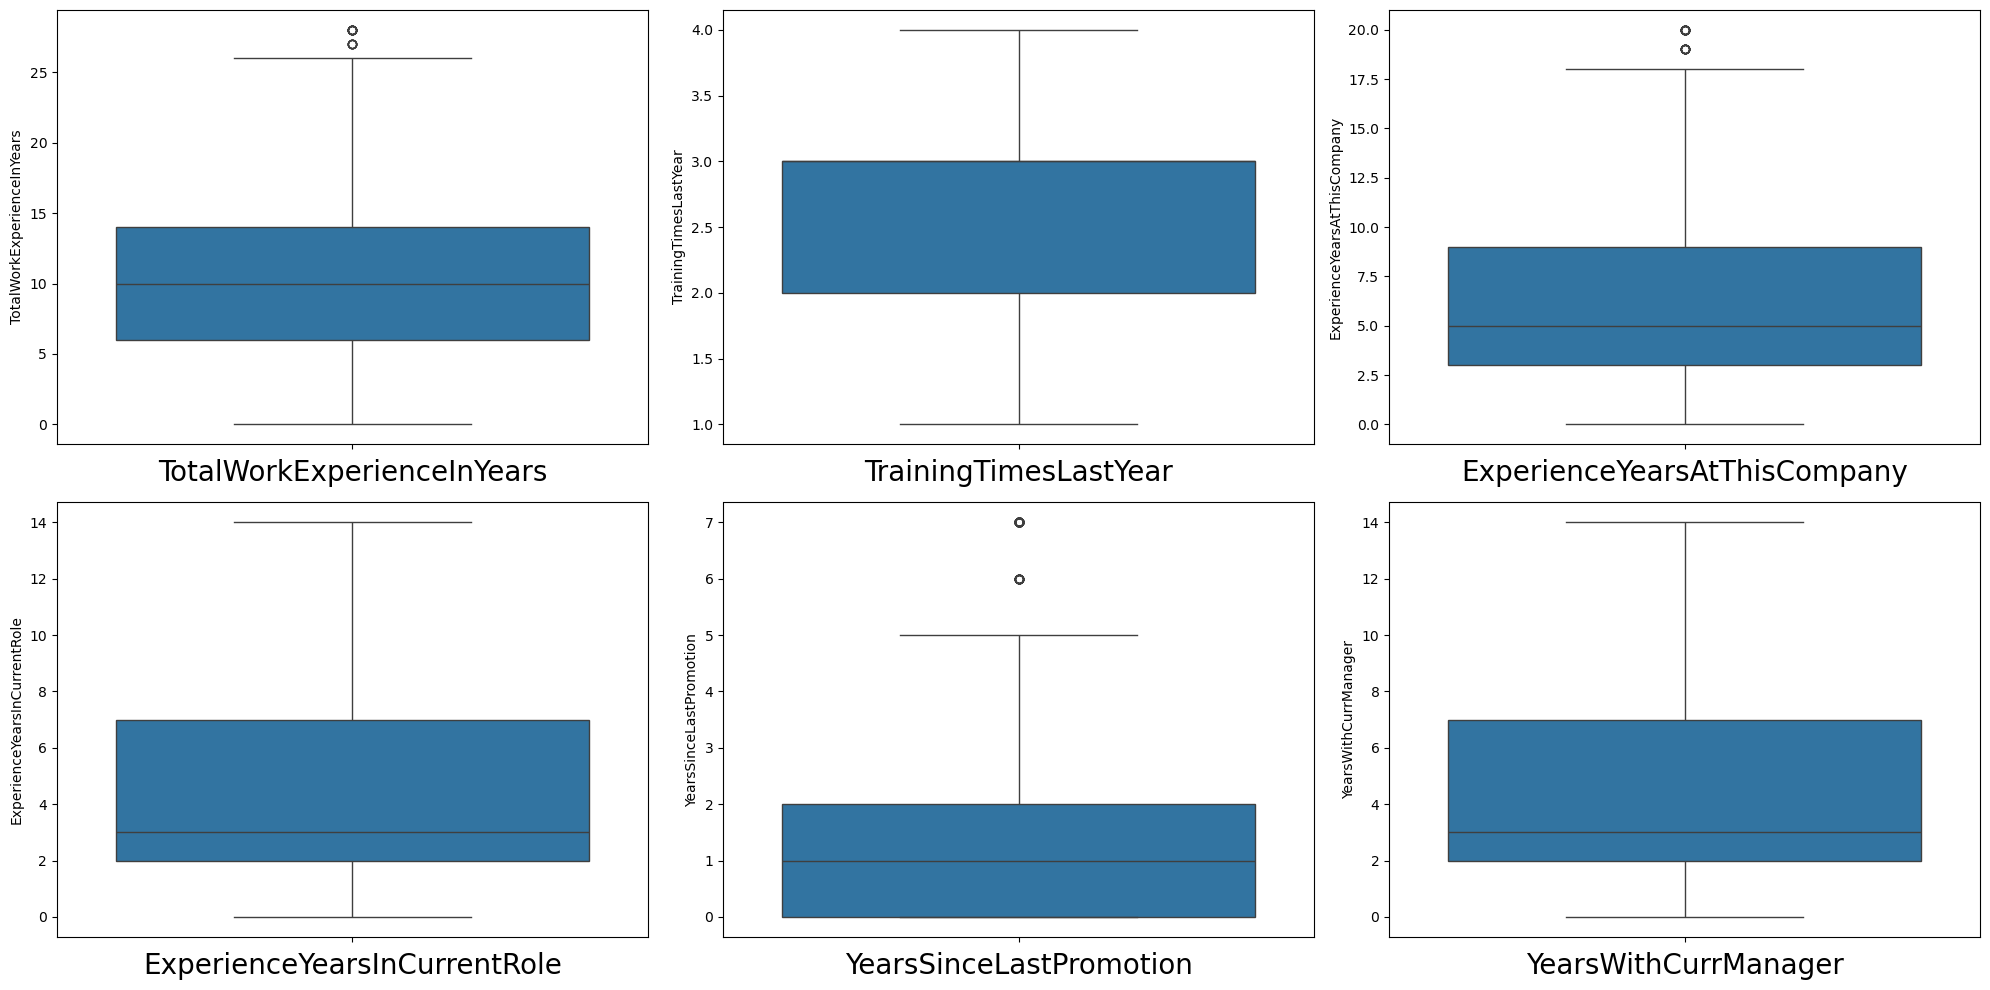

In [381]:
out = data[['TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10)) 
plotno = 1 

for column in out:
    if plotno<=7:    
        plt.subplot(2,3,plotno) 
        sns.boxplot(out[column]) 
        plt.xlabel(column,fontsize=20)  
    plotno+=1 
plt.tight_layout()
plt.show() 

**Observation:**
* Outlier impute sucessfully, but some feature box plot showing outlier, so we can not impute this outlier.

### FEATURE TRANSFORMATION

**Q-Q Plot:**  Q–Q plot is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

In [385]:
# define a function to plot a Q-Q plot
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

NameError: name 'pylab' is not defined

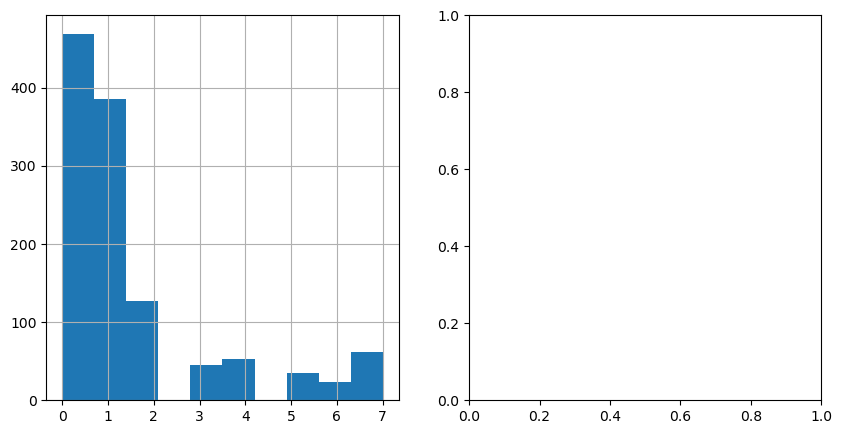

In [386]:
plot_data(data,'YearsSinceLastPromotion')

#### SQUARE ROOT TRANSFORMATION

In [ ]:
data['square_YearsSinceLastPromotion'] = data.YearsSinceLastPromotion**(1/2)

In [ ]:
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plot_data(data,'square_YearsSinceLastPromotion')

### SCALING THE DATA

**Standard Scaling:**
Standardization is the process of scaling the feature, it assumes the feature follow  normal distribution and scale the feature between mean and standard deviation, here mean is 0 and standard deviation is always 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()  #Create Object
data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'square_YearsSinceLastPromotion']]=scalar.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','square_YearsSinceLastPromotion']])

In [ ]:
data.head()

### FEATURE SELECTION

#### DROP UNIQUE AND CONTANT FEATURES

In [ ]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
data.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

#### CHECKING CORELATION
**Heatmap:** A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

* From above heatmap scale we are clearly seen the their is no highly correlated feature in data

#### CHECKING DUPLICATES

In [ ]:
data.duplicated().sum()

* Their is no Duplicates is present in data.

#### PRINCIPLE COMPONENT ANALYSIS

* Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset.

In [ ]:
# Getting the optimal value of PCA
from sklearn.decomposition import PCA

# Object creation
pca = PCA()

principlecomponent = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

**Observation:** Data is contain total 27 feature after dropping unique and constant column,from above PCA it shows the 25 feature has less varaince loss, so we are going to select 25 feature.

In [ ]:
# Selecting the components
pca = PCA(n_components=25)
new_data = pca.fit_transform(data)
new_data

#### CREATE NEW DATAFRAME

In [ ]:
principle_df = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=data.PerformanceRating

principle_df.head()

### SAVE PRE-PROCESS DATA

In [ ]:
principle_df.to_csv('employee_performance_analysis_preprocessed_data.csv')

# Reading new preprocess csv file
df = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')

# Get first five rows 
df.head()

#### MODEL CREATION & EVALUATION SUMMARY:
* Loading pre-process data
* Define dependant & independant features
* Balancing the target feature
* Split training and testing data
* Model creation, prediction & evaluation
* Model saving

In [ ]:
data = pd.read_csv('employee_performance_analysis_preprocessed_data.csv')
pd.set_option('display.max_columns',None) # Used to display the all features
data.drop('Unnamed: 0',axis=1,inplace=True) # Drop unwanted feature
data.head()

### DEFINE INDEPENDANT & DEPENDANT FEATURES

In [ ]:
X = data.iloc[:,:-1]
y = data.PerformanceRating

In [ ]:
X.head()

In [ ]:
y.head()

### BALANCING THE TARGET FEATURE

**SMOTE:** SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

* Now target feature in balance

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=42,test_size=0.20) # 20% data given to testing

In [ ]:
# Check shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

### MODEL CREATION, PREDICTION AND EVALUATION

#### AIM 
* Create a sweet spot model (Low bias, Low variance)

#### HERE WE WILL BE EXPERIMENTING WITH THREE ALGORITHM
* Random Forest
* Desision Tree
* Gradient Boosting

In [ ]:
# importing required libary 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 1. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100) # 100 decision tree
# fitting training data
rf.fit(X_train,y_train)
# Prediction on testing data
rf_test_predict = rf.predict(X_test)
# Prediction on training data
rf_train_predict = rf.predict(X_train)

#### TRANING ACCURACY

In [391]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np #if you use numpy arrays

# Assuming you have your features (X) and target (y) loaded
# Example with dummy data:
X = pd.DataFrame(np.random.rand(100, 5))  # Example features
y = pd.Series(np.random.randint(0, 2, 100)) # Example target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the training data
rf_train_predict = rf_model.predict(X_train)

# Calculate and print the training accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_predict)
print("Training accuracy of Random Forest:", rf_train_accuracy)

# Print the classification report for the training data
print("Classification report of training:\n", classification_report(y_train, rf_train_predict))

Training accuracy of Random Forest: 1.0
Classification report of training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### TESTING ACCURACY

In [396]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np #if you use numpy arrays

# Assuming you have your features (X) and target (y) loaded
# Example with dummy data:
X = pd.DataFrame(np.random.rand(100, 5))  # Example features
y = pd.Series(np.random.randint(0, 2, 100)) # Example target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_test_predict = rf_model.predict(X_test)

# Calculate and print the testing accuracy
rf_test_accuracy = accuracy_score(y_test, rf_test_predict) # corrected order of arguments
print("Testing accuracy of random forest:", rf_test_accuracy * 100)

# Print the classification report for the test data
print("Classification report of testing: \n", classification_report(y_test, rf_test_predict)) #corrected order of arguments

Testing accuracy of random forest: 60.0
Classification report of testing: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.70      0.58      0.64        12

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.62      0.60      0.60        20



#### HYPER PARAMETER TUNNING WITH GRID SEARCH

In [399]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4] 
}
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
# Print the best parameters
print("Best Hyperparameters:")
print(best_params)
# Make predictions on the testing data using the best model
best_rf_test_predict = best_rf_model.predict(X_test)

Best Hyperparameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [401]:
# Create object and place the best paramter
rf_clf1 = RandomForestClassifier(**best_params)
# Fitting the training data
rf_clf1.fit(X_train,y_train)
# Prediction on test data
rf_clf1_predict = rf_clf1.predict(X_test)

#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [404]:
rf_accuracy = accuracy_score(rf_clf1_predict,y_test)
print("Accuracy after hyperparameter tunning",rf_accuracy*100)
print("Classification report: \n",classification_report(rf_clf1_predict,y_test))

Accuracy after hyperparameter tunning 65.0
Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.67      0.73      0.70        11

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



**hyperparameter tuning strategy effectively improved the generalization ability of the Random Forest model on the testing data.**

### 2.Desision Tree

In [408]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_train_predict = dt_classifier.predict(X_train)

#### TRANING ACCURACY

In [411]:
dt_train_accuracy = accuracy_score(dt_train_predict, y_train)
print("Training accuracy of Decision Tree classifier model:", dt_train_accuracy * 100)
print("Decision Tree classifier Classification report:\n", classification_report(dt_train_predict, y_train))


Training accuracy of Decision Tree classifier model: 100.0
Decision Tree classifier Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        49

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### TESTING ACCURACY

In [414]:
# Make predictions on the testing data
dt_test_predict = dt_classifier.predict(X_test)
dt_test_accuracy = accuracy_score(dt_test_predict, y_test)
print("Testing accuracy of Decision Tree classifier model:", dt_test_accuracy * 100)
print("Decision Tree classifier Classification report for testing data:\n", classification_report(dt_test_predict, y_test))

Testing accuracy of Decision Tree classifier model: 65.0
Decision Tree classifier Classification report for testing data:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.67      0.73      0.70        11

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



#### Hyperparameter tuning using Grid Search for the Decision Tree model

In [419]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np #if you use numpy arrays

# Assuming you have your features (X) and target (y) loaded
# Example with dummy data:
X = pd.DataFrame(np.random.rand(100, 5))  # Example features
y = pd.Series(np.random.randint(0, 2, 100)) # Example target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search (Corrected: removed 'auto')
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # Corrected line
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

# Print the best parameters
print("Best Hyperparameters for Decision Tree:")
print(best_params_dt)

# Make predictions on the testing data using the best model
best_dt_test_predict = best_dt_model.predict(X_test)

# Evaluate the model
dt_test_accuracy = accuracy_score(y_test, best_dt_test_predict)
print("Testing accuracy of Decision Tree:", dt_test_accuracy)

print("Classification report of Decision Tree: \n", classification_report(y_test, best_dt_test_predict))

Best Hyperparameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Testing accuracy of Decision Tree: 0.55
Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.62      0.45      0.53        11

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20



C:\Users\Mukesh\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [421]:
# Create Decision Tree classifier with best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params_dt)
# Fitting the training data
best_dt_classifier.fit(X_train, y_train)
# Prediction on test data
best_dt_test_predict = best_dt_classifier.predict(X_test)

#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [424]:
best_dt_test_accuracy = accuracy_score(best_dt_test_predict, y_test)
print("Accuracy after hyperparameter tunning:", best_dt_test_accuracy * 100)
print("Classification Report for Testing Data with Best Decision Tree Model:\n", classification_report(best_dt_test_predict, y_test))

Accuracy after hyperparameter tunning: 40.0
Classification Report for Testing Data with Best Decision Tree Model:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.18      0.40      0.25         5

    accuracy                           0.40        20
   macro avg       0.42      0.40      0.38        20
weighted avg       0.55      0.40      0.44        20



### 3.Gradient Boosting

In [427]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
gb_train_predict = gb_classifier.predict(X_train)

#### TRAINING ACCURACY

In [430]:
gb_train_accuracy = accuracy_score(gb_train_predict, y_train)
print("Training accuracy of Gradient Boosting classifier model:", gb_train_accuracy * 100)
print("Gradient Boosting classifier Classification report for training data:\n", classification_report(gb_train_predict, y_train))

Training accuracy of Gradient Boosting classifier model: 100.0
Gradient Boosting classifier Classification report for training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        42

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



#### TESTING ACCURACY

In [433]:
# Make predictions on the testing data
gb_test_predict = gb_classifier.predict(X_test)
gb_test_accuracy = accuracy_score(gb_test_predict, y_test)
print("Testing accuracy of Gradient Boosting classifier model:", gb_test_accuracy * 100)
print("Gradient Boosting classifier Classification report for testing data:\n", classification_report(gb_test_predict, y_test))

Testing accuracy of Gradient Boosting classifier model: 50.0
Gradient Boosting classifier Classification report for testing data:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.55      0.55      0.55        11

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



#### Hyperparameter tuning using Grid Search for the  Gradient Boosting Model

In [436]:
# Define the parameter grid to search
param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
# Create RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(estimator=gb_classifier, param_distributions=param_dist_gb, 
                                       n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# Fit the random search to the data
random_search_gb.fit(X_train, y_train)
# Get the best parameters and model
best_params_gb_random = random_search_gb.best_params_
best_gb_model_random = random_search_gb.best_estimator_
# Print the best parameters
print("Best Hyperparameters for Gradient Boosting (Randomized Search):")
print(best_params_gb_random)
# Make predictions on the testing data using the best model
best_gb_test_predict_random = best_gb_model_random.predict(X_test)

Best Hyperparameters for Gradient Boosting (Randomized Search):
{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}


In [438]:
# Create Gradient Boosting classifier with the best hyperparameters
best_gb_model_random = GradientBoostingClassifier(subsample=0.9, n_estimators=100, min_samples_split=2,
                                                  min_samples_leaf=2, max_depth=4, learning_rate=0.1, random_state=42)
# Fitting the training data
best_gb_model_random.fit(X_train, y_train)
# Prediction on test data
best_gb_test_predict_random = best_gb_model_random.predict(X_test)

#### TEST ACCURACY AFTER HYPER-PARAMETER TUNNING

In [441]:
# Calculate accuracy on the testing data
best_gb_test_accuracy_random = accuracy_score(best_gb_test_predict_random, y_test)
print(f"Testing Accuracy with Best Gradient Boosting Model (Randomized Search): {best_gb_test_accuracy_random * 100:.2f}%")
# Classification report for testing data using the best model
print("Classification Report for Testing Data with Best Gradient Boosting Model (Randomized Search):\n",
      classification_report(best_gb_test_predict_random, y_test))

Testing Accuracy with Best Gradient Boosting Model (Randomized Search): 35.00%
Classification Report for Testing Data with Best Gradient Boosting Model (Randomized Search):
               precision    recall  f1-score   support

           0       0.33      0.30      0.32        10
           1       0.36      0.40      0.38        10

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20



### Among these models, the Random Forest Classifier has the highest testing accuracy

In [444]:
import pickle
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_clf1, file)